# Import

In [2]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# Data Retrieval

In [3]:
#load the csv data in a dataframe
DATA_PATH=".//dataset//metabric"
DATA_NAME="featSurv.csv"

import pandas as pd

def load_raw_data(data_path, data_name):
    csv_path = os.path.join(data_path, data_name)
    return pd.read_csv(csv_path)

df=load_raw_data(DATA_PATH,DATA_NAME)

In [4]:
#load the csv data in a dataframe
DATA_PATH=".//dataset//metabric"
DATA_NAME="featSurv.csv"

import pandas as pd

def load_raw_data(data_path, data_name):
    csv_path = os.path.join(data_path, data_name)
    return pd.read_csv(csv_path)

df=load_raw_data(DATA_PATH,DATA_NAME)

# Data Info

In [5]:
df.head()

,ID,age_at_diagnosis,size,lymph_nodes_positive,grade,histological_type,ER_IHC_status,ER.Expr,PR.Expr,HER2_IHC_status,...,NOT_IN_OSLOVAL_P53_mutation_status,NOT_IN_OSLOVAL_P53_mutation_type,NOT_IN_OSLOVAL_P53_mutation_details,NOT_IN_OSLOVAL_Pam50Subtype,NOT_IN_OSLOVAL_IntClustMemb,NOT_IN_OSLOVAL_Site,NOT_IN_OSLOVAL_Genefu,x_Prolif,time,status
0,MB-0000,75.65,22.0,10.0,3.0,IDC,pos,+,-,NaN,...,NaN,NaN,NaN,Normal,NaN,1,NaN,NaN,2999,0
1,MB-0002,43.19,10.0,0.0,3.0,IDC,pos,+,+,NaN,...,MUT,MISSENSE,MB-AD-0002+ex5,6+chr17:7519122+12521A>AC+178H>H/P+MISSENSE+FR+FR,LumA,4,1,ER+/HER2-HighProlif,1484,0
2,MB-0005,48.87,15.0,1.0,2.0,IDC,pos,+,+,NaN,...,NaN,NaN,NaN,LumB,NaN,1,NaN,NaN,3053,0
3,MB-0006,47.68,25.0,3.0,2.0,IDC,pos,+,+,0.0,...,NaN,NaN,NaN,LumB,NaN,1,NaN,NaN,1721,0
4,MB-0008,76.97,40.0,8.0,3.0,IDC,pos,+,+,NaN,...,WT,NaN,NaN,LumB,9,1,ER+/HER2- High Prolif,NaN,1241,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         1981 non-null   object 
 1   age_at_diagnosis                           1981 non-null   float64
 2   size                                       1962 non-null   float64
 3   lymph_nodes_positive                       1975 non-null   float64
 4   grade                                      1897 non-null   float64
 5   histological_type                          1981 non-null   object 
 6   ER_IHC_status                              1940 non-null   object 
 7   ER.Expr                                    1981 non-null   object 
 8   PR.Expr                                    1981 non-null   object 
 9   HER2_IHC_status                            821 non-null    float64
 10  HER2_SNP6_state         

# Feature Select Numeric and Categorical

In [7]:
featSel=[1,2,3,4,5,6,7,8,10,11,12,13,15,16,17,18,24,27,28]
df_sel=df[df.columns[featSel]].copy()

colNum=[]
colCat=[]
#separeta cat and num features
from pandas.api.types import is_numeric_dtype
for colname in df_sel.columns:
    if is_numeric_dtype(df_sel[colname]):
        colNum.append(colname)
    else:
        colCat.append(colname)


#sel Num feat
df_sel_num=df_sel[colNum].copy()

#sel cat feat
df_sel_cat=df_sel[colCat].copy()

In [8]:
df_sel_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   histological_type                          1981 non-null   object
 1   ER_IHC_status                              1940 non-null   object
 2   ER.Expr                                    1981 non-null   object
 3   PR.Expr                                    1981 non-null   object
 4   HER2_SNP6_state                            1976 non-null   object
 5   Her2.Expr                                  1981 non-null   object
 6   Treatment                                  1981 non-null   object
 7   NOT_IN_OSLOVAL_menopausal_status_inferred  1970 non-null   object
 8   NOT_IN_OSLOVAL_cellularity                 1917 non-null   object
dtypes: object(9)
memory usage: 139.4+ KB


# Data Cleaning 1 (Missing Value & Feature Scaling for Numeric Features)

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler 


#obj imp
imputer = SimpleImputer(strategy='median')

#obj sca
scaler=MinMaxScaler()


#fit imputer
imputer.fit(df_sel_num)
#trans
arr_sel_num_imp=imputer.transform(df_sel_num)

#fit scaling
scaler.fit(arr_sel_num_imp)
feat_sel_num_imp=scaler.transform(arr_sel_num_imp)


df_sel_num_imp=pd.DataFrame(feat_sel_num_imp,columns=df_sel_num.columns)


#save and remove status 
df_status=df_sel_num_imp['status'].copy()
df_sel_num_imp=df_sel_num_imp.drop('status',axis=1)
feat_sel_num_imp=df_sel_num_imp.to_numpy()
df_sel_num_imp.info()
feat_sel_num_imp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age_at_diagnosis                    1981 non-null   float64
 1   size                                1981 non-null   float64
 2   lymph_nodes_positive                1981 non-null   float64
 3   grade                               1981 non-null   float64
 4   NOT_IN_OSLOVAL_stage                1981 non-null   float64
 5   NOT_IN_OSLOVAL_lymph_nodes_removed  1981 non-null   float64
 6   NOT_IN_OSLOVAL_NPI                  1981 non-null   float64
 7   NOT_IN_OSLOVAL_Site                 1981 non-null   float64
 8   time                                1981 non-null   float64
dtypes: float64(9)
memory usage: 139.4 KB


array([[0.72243141, 0.12087912, 0.22222222, ..., 0.94029851, 0.        ,
        0.32512208],
       [0.2859064 , 0.05494505, 0.        , ..., 0.56343284, 0.33333333,
        0.16071622],
       [0.36229155, 0.08241758, 0.02222222, ..., 0.56529851, 0.        ,
        0.33098209],
       ...,
       [0.55096826, 0.13736264, 1.        , ..., 0.94216418, 0.33333333,
        0.57254476],
       [0.52756859, 0.13736264, 0.26666667, ..., 0.75559701, 0.33333333,
        0.28041237],
       [0.51223776, 0.10989011, 0.02222222, ..., 0.75373134, 0.33333333,
        0.63917526]])

# Data Cleaning 2 (Missing Value for Categorical Features)

In [10]:
#Fill missing data with None (we don't add extra bias)
df_sel_cat.fillna('None',inplace=True)
df_sel_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   histological_type                          1981 non-null   object
 1   ER_IHC_status                              1981 non-null   object
 2   ER.Expr                                    1981 non-null   object
 3   PR.Expr                                    1981 non-null   object
 4   HER2_SNP6_state                            1981 non-null   object
 5   Her2.Expr                                  1981 non-null   object
 6   Treatment                                  1981 non-null   object
 7   NOT_IN_OSLOVAL_menopausal_status_inferred  1981 non-null   object
 8   NOT_IN_OSLOVAL_cellularity                 1981 non-null   object
dtypes: object(9)
memory usage: 139.4+ KB


# Data Cleaning 3 (OneHotEncoder for categoral)

In [11]:
from sklearn.preprocessing import OneHotEncoder

#from cat to ohe
encoderOHE=OneHotEncoder(sparse=False)
encoderOHE.fit(df_sel_cat)
feat_sel_cat=encoderOHE.transform(df_sel_cat)
feat_sel_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

# Train, Val, Test datasets

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np
X=np.concatenate((feat_sel_num_imp, feat_sel_cat), axis=1)
y=df_status

X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 41)

In [13]:
X_train

array([[0.46906939, 0.14285714, 0.06666667, ..., 0.        , 0.        ,
        1.        ],
       [0.60086068, 0.07692308, 0.06666667, ..., 1.        , 0.        ,
        0.        ],
       [0.45750403, 0.13736264, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.71167294, 0.15384615, 0.08888889, ..., 1.        , 0.        ,
        0.        ],
       [0.55809575, 0.04395604, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.45346961, 0.10989011, 0.08888889, ..., 0.        , 0.        ,
        1.        ]])

# Score Func

In [14]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

# Classifier ML Models

# Logistic Regression

In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg=LogisticRegression().fit( X_train, y_train )

scores = cross_val_score(log_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
lin_rmse = np.sqrt(-scores)

display_scores(lin_rmse)


Scores: [0.56077215 0.58277152 0.54944226 0.52605091 0.51558005 0.51558005
 0.5395732  0.5454066  0.4839186  0.5216818 ]
Mean: 0.5340777130973708
Standard deviation: 0.02626146363697269


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
tree_rmse = np.sqrt(-scores)

display_scores(tree_rmse)

Scores: [0.56635211 0.5200387  0.56077215 0.53199518 0.527713   0.57368452
 0.56254395 0.5568901  0.527713   0.62642243]
Mean: 0.5554125148480173
Standard deviation: 0.02985283893412519


# Neural Networks

In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)



scores = cross_val_score(clf, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
MLP_rmse = np.sqrt(-scores)

display_scores(MLP_rmse)

Scores: [0.5881428  0.53199518 0.5200387  0.5200387  0.55117825 0.5568901
 0.55117825 0.5454066  0.45003516 0.56254395]
Mean: 0.5377447692097216
Standard deviation: 0.03506304011408903


# Ensemble Learning: Building a model on top of many other models

In [18]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

scores = cross_val_score(forest_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
forest_rmse = np.sqrt(-scores)

display_scores(forest_rmse)

Scores: [0.40044158 0.41859078 0.39189429 0.39979397 0.3902466  0.41842381
 0.39963195 0.41877912 0.40654145 0.44850173]
Mean: 0.40928452595454534
Standard deviation: 0.01652905604415905


# Grid Search CV


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
     print(np.sqrt(-mean_score), params)


0.5076521816474798 {'max_features': 2, 'n_estimators': 3}
0.4576211779571334 {'max_features': 2, 'n_estimators': 10}
0.4399887782489751 {'max_features': 2, 'n_estimators': 30}
0.4987977310769205 {'max_features': 4, 'n_estimators': 3}
0.4415558050463965 {'max_features': 4, 'n_estimators': 10}
0.43092260099324303 {'max_features': 4, 'n_estimators': 30}
0.47872936748382033 {'max_features': 6, 'n_estimators': 3}
0.4458085666759117 {'max_features': 6, 'n_estimators': 10}
0.4244103227604187 {'max_features': 6, 'n_estimators': 30}
0.4876504679340857 {'max_features': 8, 'n_estimators': 3}
0.4449949715418369 {'max_features': 8, 'n_estimators': 10}
0.42126333488916357 {'max_features': 8, 'n_estimators': 30}
0.5175068705041966 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.4588124505204992 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.5086296688066159 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.4556022976892295 {'bootstrap': False, 'max_features': 3,

In [20]:
forest_reg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=4,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
        
scores = cross_val_score(forest_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
forest_rmse = np.sqrt(-scores)

display_scores(forest_rmse)

Scores: [0.49877558 0.50434866 0.49666955 0.51734418 0.50871449 0.5323567
 0.5323567  0.52704628 0.48319145 0.5343345 ]
Mean: 0.5135138106016545
Standard deviation: 0.016937629412527615


# Random Forest best estimator prediction

In [21]:
from sklearn.metrics import mean_squared_error
final_model=grid_search.best_estimator_
final_predictions=final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.40576243913269644

#  Visualize features and weights

In [22]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes =list(df_sel_num.columns)+list(encoderOHE.get_feature_names())
sorted(zip(feature_importances, attributes),reverse=True)

[(0.21004954173081478, 'time'),
 (0.1308399985514206, 'age_at_diagnosis'),
 (0.08813515867507471, 'NOT_IN_OSLOVAL_Site'),
 (0.07903347222209213, 'NOT_IN_OSLOVAL_lymph_nodes_removed'),
 (0.0775810237351236, 'NOT_IN_OSLOVAL_NPI'),
 (0.07298495296917169, 'size'),
 (0.041566800027631925, 'lymph_nodes_positive'),
 (0.029940288270746507, 'NOT_IN_OSLOVAL_stage'),
 (0.02105335506260842, 'grade'),
 (0.014444266763197848, 'x8_low'),
 (0.013473511363265115, 'x6_HT/RT'),
 (0.012613701780256068, 'x6_HT'),
 (0.012033121573761475, 'x8_None'),
 (0.011701742573326585, 'x2_-'),
 (0.011445914413678608, 'x4_LOSS'),
 (0.01122247284342176, 'x3_+'),
 (0.010915811070450584, 'x6_CT/RT'),
 (0.010559876416648375, 'x1_None'),
 (0.009668890839736996, 'x0_DCIS'),
 (0.008496341236330864, 'x6_CT/HT'),
 (0.00841830333237383, 'x7_None'),
 (0.008308191704495526, 'x8_high'),
 (0.007656605882412168, 'x6_NONE'),
 (0.007513871418043299, 'x3_-'),
 (0.007504392646984847, 'x1_neg'),
 (0.007478127448982037, 'x5_+'),
 (0.0074507

# Learning Curve

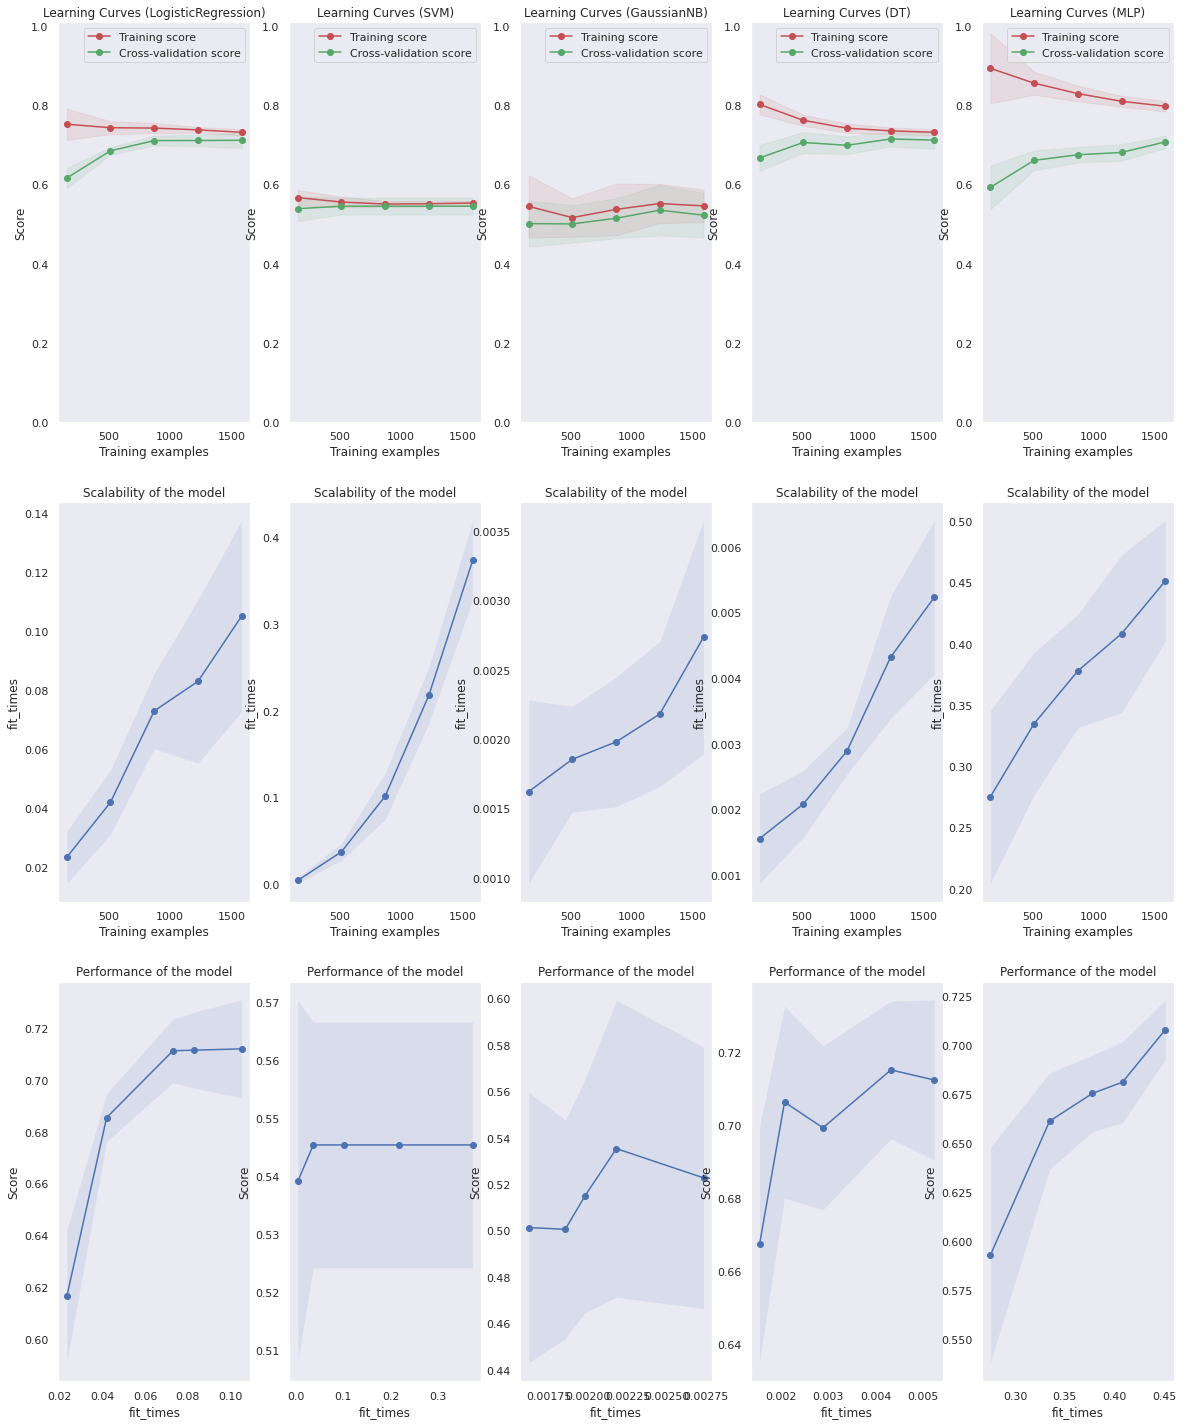

In [30]:

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC as SVM
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(3, 5, figsize=(20, 25))

title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (SVM)"
estimator = SVM(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)



title = "Learning Curves (GaussianNB)"
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (DT)"
estimator = DecisionTreeClassifier(max_depth=3)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 3], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (MLP)"
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 4], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

# Kaplan-Meier-Estimator

Text(0.5, 0, 'timeline [months]')

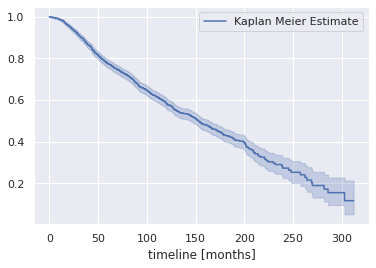

In [24]:
# Python code to create the above Kaplan Meier curve
from lifelines import KaplanMeierFitter

## Example Data 
durations = df['time']/29.53059
event_observed = df['status']

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot() ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.
plt.xlabel('timeline [months]')

<AxesSubplot:xlabel='log(HR) (95% CI)'>

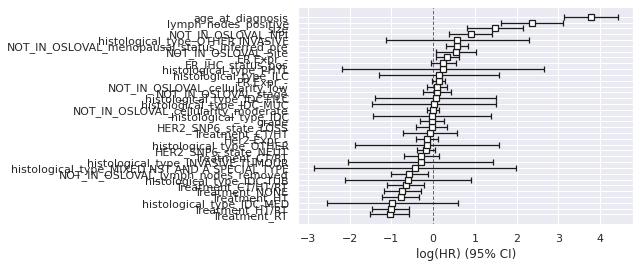

In [25]:
from lifelines import CoxPHFitter

df_sel_dummy=pd.get_dummies(df_sel, drop_first=True)

#obj sca
scaler=MinMaxScaler()

#fit imputer
imputer.fit(df_sel_dummy)

#trans
arr_sel_dummy_imp=imputer.transform(df_sel_dummy)

#fit scaling
scaler.fit(arr_sel_dummy_imp)
feat_sel_dummy_imp=scaler.transform(arr_sel_dummy_imp)
df_sel_dummy_imp=pd.DataFrame(feat_sel_dummy_imp,columns=df_sel_dummy.columns)





df_sel_dummy_imp['time']=df['time']/29.6




# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_sel_dummy_imp, 'time', event_col='status')   ## Fit the data to train the model
#cph.print_summary()    ## HAve a look at the significance of the features
cph.plot()

In [26]:
df_test=df_sel_dummy_imp.drop(['time','status'],axis=1)

<AxesSubplot:>

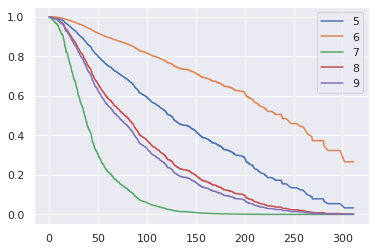

In [27]:
tr_rows = df_test.iloc[5:10,:]
tr_rows

cph.predict_survival_function(tr_rows).plot()